# #QuarentenaDados

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Reading [MovieLens](https://grouplens.org/datasets/movielens/) data

In [2]:
movies = pd.read_csv('../Files/movies.csv')
movies_ratings = pd.read_csv('../Files/ratings.csv')

In [3]:
average_ratings = movies_ratings.groupby('movieId')['rating'].mean()
movies = movies.join(average_ratings, on='movieId')

Average ratings of movie:  0    Toy Story (1995)
Name: title, dtype: object 3.9209302325581397


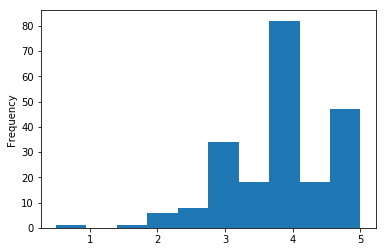

In [4]:
ratings_movie_1 = movies_ratings.query('movieId == 1')['rating']
print("Average ratings of movie: ", movies.query('movieId == 1')['title'], ratings_movie_1.mean())
ratings_movie_1.plot(kind='hist')
plt.show()

Average ratings of movie:  1    Jumanji (1995)
Name: title, dtype: object 3.4318181818181817


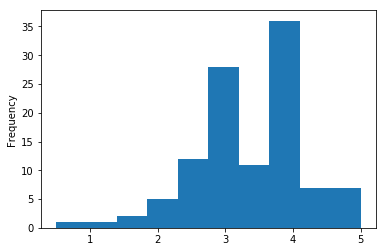

In [5]:
ratings_movie_1 = movies_ratings.query('movieId == 2')['rating']
print("Average ratings of movie: ", movies.query('movieId == 2')['title'], ratings_movie_1.mean())
ratings_movie_1.plot(kind='hist')
plt.show()

In [6]:
# Changes made to challenges 2, 3 and 4 of the first class

movies = movies.rename(columns={'rating': 'average_rating'})

number_of_ratings = movies_ratings.groupby('movieId')['rating'].count()
movies = movies.join(number_of_ratings, on='movieId')

movies = movies.rename(columns={'rating': 'number_of_ratings'})

movies['average_rating'] = movies['average_rating'].round(2)
movies.head()

,movieId,title,genres,average_rating,number_of_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Challenge 1 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)

Rotate the thicks (the names of the genres) of the green bar graph (the last one), in order to make the legends more readable.

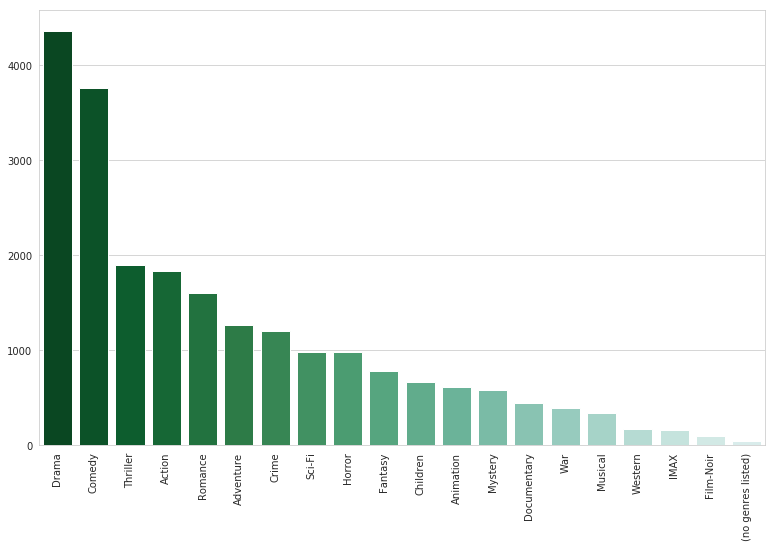

In [7]:
sns.set_style("whitegrid")

movies_by_genre = movies["genres"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(13,8))
sns.barplot(x=movies_by_genre.index,
            y=movies_by_genre.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genre) + 4))

plt.xticks(rotation=90)
plt.show()

## Challenge 2 by [Paulo Silveira](https://twitter.com/paulo_caelum)


To find several films with similar averages and different distributions, use the **movie_plot (n)** function to plot.

In [8]:
def movie_plot(n):
    find_id = 'movieId' + '==' + str(n)
    rating_movie = movies_ratings.query(find_id)["rating"]
    print('\n')
    print('Movie: ', filtered_movies.query(find_id)["title"])
    
    plt.figure(figsize = (13,8))
#     plt.subplot(1, 2, 1)
    rating_movie.plot(kind='hist')
    
#     plt.subplot(1, 2, 2)
#     rating_movie.plot.box(vert=False)
    plt.show()
    print(rating_movie.describe())

In [9]:
sorted_movies = movies.sort_values('average_rating', ascending=False)
filtered_movies = sorted_movies[(sorted_movies['average_rating'] >= 3.0) & (sorted_movies['average_rating'] <= 3.5)][1000:1050]
filtered_movies.head()

,movieId,title,genres,average_rating,number_of_ratings
551,661,James and the Giant Peach (1996),Adventure|Animation|Children|Fantasy|Musical,3.45,49.0
2808,3753,"Patriot, The (2000)",Action|Drama|War,3.45,68.0
9430,166461,Moana (2016),Adventure|Animation|Children|Comedy|Fantasy,3.45,10.0
513,596,Pinocchio (1940),Animation|Children|Fantasy|Musical,3.45,60.0
2537,3397,"Great Muppet Caper, The (1981)",Children|Comedy,3.45,11.0




Movie:  551    James and the Giant Peach (1996)
Name: title, dtype: object


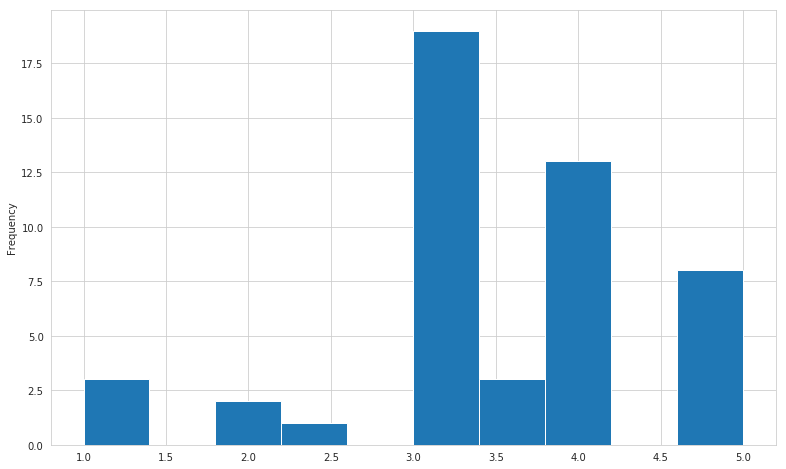

count    49.00000
mean      3.44898
std       1.02187
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       5.00000
Name: rating, dtype: float64


Movie:  2808    Patriot, The (2000)
Name: title, dtype: object


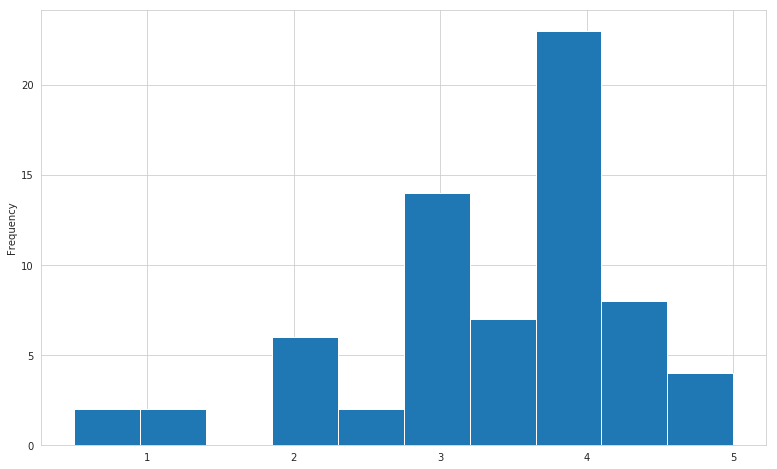

count    68.000000
mean      3.448529
std       1.037145
min       0.500000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


In [10]:
for ID in filtered_movies['movieId'].values[0:2]:
    movie_plot(ID)

## Challenge 3 by [Paulo Silveira](https://twitter.com/paulo_caelum)

Create the boxplot of the 10 films with the most votes (it is not with the highest average, it is with the most votes!). Not only plot, but also analyze and try to draw conclusions.

In [11]:
most_rated = movies.sort_values('number_of_ratings', ascending=False)[0:10]
top_10 = most_rated['movieId'].values
top_10 = list(top_10)

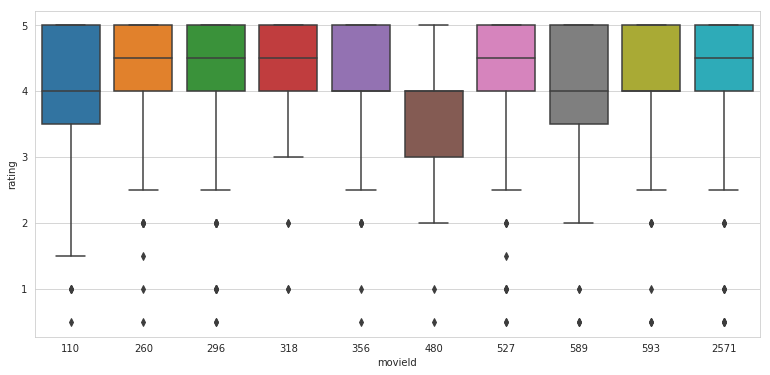

In [12]:
plt.figure(figsize=(13,6))

sns.boxplot(data=movies_ratings.query('movieId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]'), x='movieId', y='rating')
plt.show()

## Challenge 4 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)

Configure the view of the boxplot generated by seaborn (last boxplot plotted in class). Configure the size and put the name of the movies in the thicks.

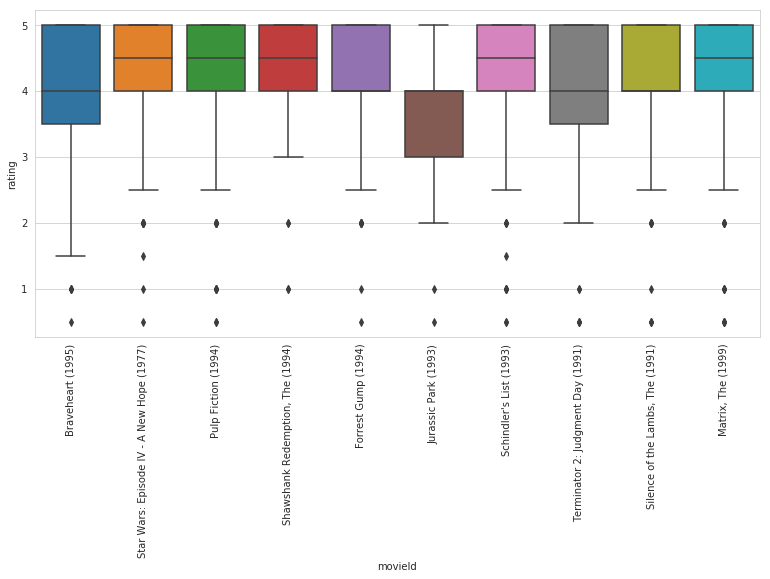

In [13]:
plt.figure(figsize=(13,6))

sns.boxplot(data=movies_ratings.query('movieId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]'), x='movieId', y='rating')
box_movies = movies.query('movieId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]')['title']

plt.xticks(np.arange(0,len(top_10)), box_movies, rotation=90)
plt.show()

## Challenge 5 by [Allan Spadini](https://twitter.com/allanspadini)

Calculate fashion, average and median of the films. Explore films with notes closer to 0.5, 3 and 5.

In [14]:
def movie_stats(average_rating):

    movie = movies.sort_values('number_of_ratings', ascending=False)[movies['average_rating'] == average_rating].iloc[0,:]
    ratings = movies_ratings[movies_ratings['movieId'] == movie['movieId']]['rating']

    print("\nMovie:", movie['title'])
    print("\nMode:", ratings.mode().values[0])
    print("\nMedian:", ratings.median())
    print("\nMean:", ratings.mean())
    print("\n")

In [15]:
movie_stats(4.5)
movie_stats(3)
movie_stats(0.8)


Movie: Five Easy Pieces (1970)

Mode: 5.0

Median: 4.75

Mean: 4.5



Movie: Home Alone (1990)

Mode: 3.0

Median: 3.0

Mean: 2.9956896551724137



Movie: Police Academy: Mission to Moscow (1994)

Mode: 0.5

Median: 0.5

Mean: 0.8




/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## Challenge 6 by [Thais André](https://twitter.com/thais_tandre)

Plot the boxplot and histogram next to each other (in the same figure or in different figures, but next to each other).

In [16]:
def movie_plot(n):
    find_id = 'movieId' + '==' + str(n)
    rating_movie = movies_ratings.query(find_id)["rating"]
    
    plt.figure(figsize = (13,8))
    plt.subplot(1, 2, 1)
    rating_movie.plot(kind='hist')
    print('\n')
    
    plt.subplot(1, 2, 2)
    rating_movie.plot.box(vert=False)
    plt.show()
    print(rating_movie.describe())

## Movie Id: 661

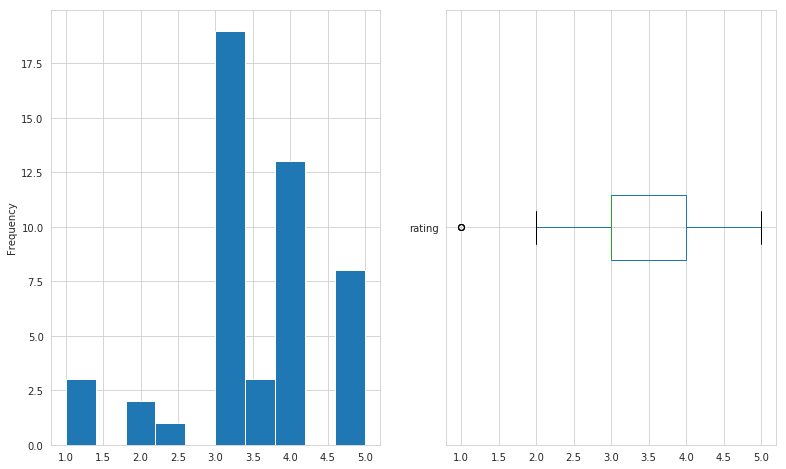

count    49.00000
mean      3.44898
std       1.02187
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       5.00000
Name: rating, dtype: float64


## Movie Id: 3753

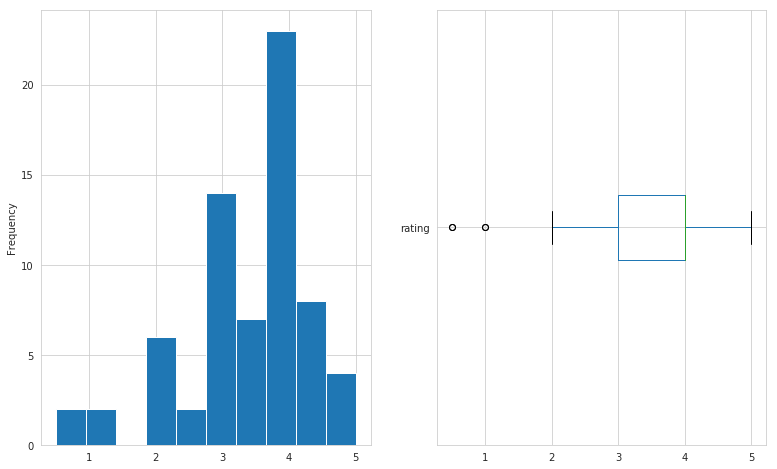

count    68.000000
mean      3.448529
std       1.037145
min       0.500000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


In [17]:
for ID in filtered_movies['movieId'].values[0:2]:
    display(Markdown('## Movie Id: ' + str(ID)))
    movie_plot(ID)

## Challenge 7 by [Thiago Gonçalves](https://twitter.com/tgcsantos)

Create a chart of average grades per year (overall average considering all films released that year).

In [18]:
movies_title_year = movies.copy()

movies_title_year['title'] = movies['title'].str.split('(', expand=True).loc[:,0]
movies_title_year['year'] = movies['title'].str.extract("\((\d{4})\)")

movies_title_year.head()

,movieId,title,genres,average_rating,number_of_ratings,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0,1995
1,2,Jumanji,Adventure|Children|Fantasy,3.43,110.0,1995
2,3,Grumpier Old Men,Comedy|Romance,3.26,52.0,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,2.36,7.0,1995
4,5,Father of the Bride Part II,Comedy,3.07,49.0,1995


In [19]:
years = []
years_avg = []

for year in movies_title_year['year']:
    years.append(str(year))

movies_years = set(years)


for year in movies_years:
    year_mean = movies_title_year[movies_title_year['year'] == year]['average_rating'].mean()
    years_avg.append(year_mean)

In [20]:
dic_avg = {'Average_rating_year': years_avg}
movies_avg_rating = pd.DataFrame(dic_avg, index=movies_years)
movies_avg_rating.sort_index(inplace=True)

movies_avg_rating.head()

,Average_rating_year
1902,3.5000
1903,2.5000
1908,4.0000
1915,2.0000
1916,3.5625


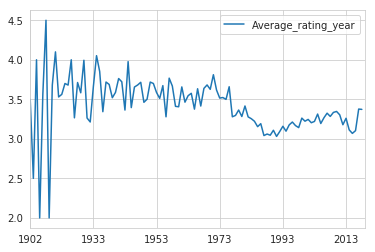

In [21]:
movies_avg_rating.plot()
plt.show()